In [1]:
from fastcda import FastCDA
from dgraph_flex import DgraphFlex

fc = FastCDA()

In [2]:
# show the version of Tetrad we are using
fc.getTetradVersion()

'7.6.3-0'

In [3]:
def read_edge_list(text:str):
    """
    extract edges from a text string
    
    1. GridB_secs --> GridA_secs
    2. GridB_secs_ --> GridB_secs
    3. SpatialSpan3_perc_accuracy --- SpatialSpan4_perc_accuracy
    4. SpatialSpan4_perc_accuracy --- SpatialSpan5_perc_accuracy
    5. SpatialSpan5_perc_accuracy --> GridB_secs
    """
    edges = []
    for line in text.strip().split("\n"):
        line = line.strip()
        if line:
            parts = line.split(" ")
            if len(parts) == 4 and parts[2] == "-->":
                edges.append(f"{parts[1]} {parts[2]} {parts[3]}")
    return edges

In [4]:
# given a list of directed edges defining a DAG,
# create a method that uses networkx to create a directed graph
# and return the nodes and edges of the graph that are 
# ancestors of a given target node
def get_ancestors_dag(edge_list, target_node):
    import networkx as nx
    G = nx.DiGraph()
    for edge in edge_list:
        parts = edge.split(" ")
        if len(parts) == 3 and parts[1] == "-->":
            G.add_edge(parts[0], parts[2])
    ancestors = nx.ancestors(G, target_node)
    ancestors.add(target_node)
    subgraph = G.subgraph(ancestors)
    
    # create a new edge list with the same format as the input
    new_edge_list = []
    for u, v in subgraph.edges:
        new_edge_list.append(f"{u} --> {v}")
    return new_edge_list

In [5]:
edge_texts = {}
groups = {}
# group 1  20251016
groups['group_1'] =  ['R23', 'R3', 'R16', 'R21', 'R9', 'R4', 'R25', 'R27', 'R24', 'R22', 'R18']
edge_texts['group_1'] = """
1. GridB_secs --> GridA_secs
2. GridB_secs_ --> GridB_secs
3. SpatialSpan3_perc_accuracy --- SpatialSpan4_perc_accuracy
4. SpatialSpan4_perc_accuracy --- SpatialSpan5_perc_accuracy
5. SpatialSpan5_perc_accuracy --> GridB_secs
6. accomplish_ --> accomplish
7. depressed --> feel_burden
8. depressed --> pain_mind
9. depressed --> pain_worry
10. depressed --> serious
11. depressed --> stressed
12. depressed_ --> depressed
13. depressed_ --> pain_cope
14. fatigue --> accomplish
15. fatigue_ --> fatigue
16. feel_burden_ --> feel_burden
17. feel_burden_ --> feel_support
18. feel_direction --> get_better
19. feel_direction_ --> feel_direction
20. feel_support_ --> feel_support
21. get_better --> pain_strategy
22. pain_cope --> get_better
23. pain_cope --> pain_strategy
24. pain_cope_ --> pain_cope
25. pain_intens --> rested
26. pain_intens_ --> pain_intens
27. pain_interf --> feel_burden
28. pain_interf --> pain_intens
29. pain_interf --> pain_strategy
30. pain_interf_ --> pain_interf
31. pain_mind --> pain_cope
32. pain_mind --> pain_intens
33. pain_mind --> pain_interf
34. pain_mind --> pain_worry
35. pain_mind --> serious
36. pain_mind --> stressed
37. pain_mind_ --> pain_mind
38. pain_strategy_ --> pain_strategy
39. pain_worry --> pain_interf
40. pain_worry --> serious
41. pain_worry --> stressed
42. pain_worry_ --> depressed
43. pain_worry_ --> pain_worry
44. rested --> fatigue
45. rested_ --> rested
46. serious --> trust_provid
47. stressed --> fatigue
48. stressed --> pain_interf
49. stressed --> rested
50. stressed_ --> stressed
51. trust_provid --> fatigue
52. trust_provid_ --> pain_strategy
53. trust_provid_ --> trust_provid
"""



In [6]:
# group_2
groups['group_2'] =  ['R15', 'R6'] 
edge_texts['group_2'] = """
1. GridA_secs --- GridB_secs
2. GridB_secs_ --> trust_provid
3. accomplish --> depressed
4. depressed --> feel_direction
5. depressed --> pain_strategy
6. fatigue --> accomplish
7. fatigue_ --> fatigue
8. feel_direction_ --> pain_strategy
9. feel_direction_ --> rested
10. pain_cope --> trust_provid
11. pain_interf --- pain_mind
12. pain_mind --- pain_intens
13. pain_mind --- pain_worry
14. pain_strategy --> get_better
15. pain_strategy --> pain_cope
16. rested --> fatigue
17. serious_ --> serious
18. stressed --> depressed
19. stressed --> feel_burden
20. stressed_ --> stressed
21. trust_provid_ --> trust_provid
"""

In [7]:
# group_3
groups['group_3'] =   ['R14', 'R11'] 
edge_texts['group_3'] = """
1. GridA_secs_ --> get_better
2. GridB_secs --- GridA_secs
3. accomplish --> feel_burden
4. depressed --> accomplish
5. depressed --> fatigue
6. depressed --> feel_burden
7. depressed --> pain_strategy
8. depressed --> pain_worry
9. depressed --> stressed
10. fatigue --> rested
11. feel_burden --> get_better
12. feel_burden --> pain_interf
13. feel_direction --> depressed
14. feel_direction --> pain_cope
15. feel_support --> trust_provid
16. feel_support_ --> feel_support
17. pain_cope --> pain_strategy
18. pain_cope_ --> feel_support
19. pain_intens --> pain_mind
20. pain_interf --> pain_intens
21. pain_interf --> pain_mind
22. pain_interf --> serious
23. pain_mind_ --> feel_burden
24. pain_strategy --> get_better
25. pain_worry --> pain_cope
26. pain_worry --> pain_intens
27. pain_worry --> pain_interf
28. trust_provid --> feel_direction
"""

In [8]:
# group_4
groups['group_4'] =   ['R26', 'R28', 'R2', 'R8']
edge_texts['group_4'] = """
1. GridB_secs --> GridA_secs
2. GridB_secs_ --> depressed
3. SpatialSpan3_perc_accuracy --- SpatialSpan4_perc_accuracy
4. SpatialSpan3_perc_accuracy --> trust_provid
5. SpatialSpan4_perc_accuracy_ --> SpatialSpan5_perc_accuracy
6. SpatialSpan5_perc_accuracy --> GridB_secs
7. SpatialSpan5_perc_accuracy --> SpatialSpan3_perc_accuracy
8. SpatialSpan5_perc_accuracy --> SpatialSpan4_perc_accuracy
9. accomplish --> feel_support
10. accomplish --> pain_cope
11. accomplish --> pain_strategy
12. depressed --> feel_burden
13. depressed --> serious
14. depressed --> stressed
15. depressed_ --> depressed
16. fatigue_ --> fatigue
17. feel_direction --> accomplish
18. feel_direction --> depressed
19. feel_direction --> pain_strategy
20. feel_direction --> trust_provid
21. feel_direction_ --> pain_mind
22. feel_support --> get_better
23. pain_cope --> feel_support
24. pain_cope_ --> accomplish
25. pain_intens --> depressed
26. pain_intens --> feel_direction
27. pain_intens --> pain_interf
28. pain_intens --> pain_mind
29. pain_intens --> pain_worry
30. pain_intens --> serious
31. pain_interf --> fatigue
32. pain_interf --> get_better
33. pain_interf_ --> pain_intens
34. pain_mind --> pain_interf
35. pain_strategy_ --> pain_cope
36. rested_ --> pain_intens
37. stressed --> pain_interf
38. stressed --> pain_mind
"""

In [9]:
# group_5
groups['group_5'] =  ['R10', 'R20', 'R13'] 
edge_texts['group_5'] = """
1. GridA_secs --> GridB_secs
2. GridA_secs --> feel_direction
3. GridA_secs_ --> GridA_secs
4. GridA_secs_ --> trust_provid
5. GridB_secs_ --> stressed
6. SpatialSpan3_perc_accuracy --- SpatialSpan5_perc_accuracy
7. SpatialSpan3_perc_accuracy --> pain_worry
8. SpatialSpan4_perc_accuracy --- SpatialSpan3_perc_accuracy
9. accomplish --> feel_support
10. depressed --> fatigue
11. depressed --> feel_support
12. fatigue --> accomplish
13. fatigue --> rested
14. feel_burden --> pain_worry
15. feel_burden_ --> pain_mind
16. feel_direction --> depressed
17. feel_direction --> feel_burden
18. feel_direction --> pain_mind
19. feel_direction --> serious
20. feel_direction_ --> get_better
21. feel_direction_ --> trust_provid
22. get_better --> feel_direction
23. get_better --> pain_worry
24. pain_cope --> pain_strategy
25. pain_intens --> accomplish
26. pain_intens --> feel_burden
27. pain_intens --> pain_cope
28. pain_intens --> rested
29. pain_interf --> pain_intens
30. pain_interf --> pain_strategy
31. pain_mind --> fatigue
32. pain_mind --> pain_intens
33. pain_mind --> pain_interf
34. pain_mind --> stressed
35. pain_mind_ --> feel_direction
36. pain_mind_ --> pain_cope
37. pain_worry --> depressed
38. pain_worry_ --> pain_worry
39. pain_worry_ --> stressed
40. serious_ --> GridB_secs
41. serious_ --> serious
42. stressed --> depressed
43. stressed --> feel_burden
44. stressed --> pain_interf
45. stressed --> serious
46. stressed_ --> stressed
47. trust_provid_ --> serious
"""

In [10]:
# read into a list of edges
edge_lists={}
group = 'group_1'
edge_lists[group] = read_edge_list(edge_texts[group])  
pass 

In [11]:
import pandas as pd
def read_group_data(ids:list[str]):
    """
    read the  data from the individual files in the data 
    directory  id.csv
    """
    dir = "data"
    # create empty dataframe
    group_data = pd.DataFrame()
    for id in ids:
        filepath = f"{dir}/{id}.csv"
        df = pd.read_csv(filepath)
        # append to group_data
        group_data = pd.concat([group_data, df], ignore_index=True)
    return group_data


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
# read in edges for all groups


group_keys = ['group_1', 'group_2', 'group_3', 'group_4', 'group_5']
for group in group_keys:
    edge_lists[group] = read_edge_list(edge_texts[group])
    
    # check if 'pain_interf' is in the edges
    nodes = set()
    for edge in edge_lists[group]:
        parts = edge.split(" ")
        if len(parts) == 3 and parts[1] == "-->":
            nodes.add(parts[0])
            nodes.add(parts[2])
    if 'pain_interf' not in nodes:
        print(f"'pain_interf' not in edges for {group}, skipping...")
        continue
    print(f"Processing {group} with edges:")
    # get the ancestors of pain_interf
    ancestor_edge_list = get_ancestors_dag(edge_lists[group], 'pain_interf')

    # convert edges for lavaan model
    lavaan_model = fc.edges_to_lavaan(edge_lists[group])
    
    # read in the data for the group
    data = read_group_data(groups[group])
    # run sem
    sem_results = fc.run_semopy(lavaan_model, data)

    dg = DgraphFlex()  # create an object

    # create new blank plot
    plt.figure()

    #dg.add_edges(edge_lists[group])  # add edges
    dg.add_edges(ancestor_edge_list)  # add edges
    # add the sem results to the graph
    fc.add_sem_results_to_graph(dg, sem_results['estimates'])
    dg.save_graph(f"{group}_graph_pain_interf")
    dg.show_graph()
pass   

Processing group_1 with edges:
'pain_interf' not in edges for group_2, skipping...
Processing group_3 with edges:
Processing group_4 with edges:
Processing group_5 with edges:


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Edges: ['depressed_ --> depressed', 'pain_worry --> pain_interf', 'pain_worry --> stressed', 'pain_interf_ --> pain_interf', 'pain_worry_ --> depressed', 'pain_worry_ --> pain_worry', 'depressed --> pain_mind', 'depressed --> pain_worry', 'depressed --> stressed', 'stressed --> pain_interf', 'pain_mind_ --> pain_mind', 'pain_mind --> pain_interf', 'pain_mind --> pain_worry', 'pain_mind --> stressed', 'stressed_ --> stressed']


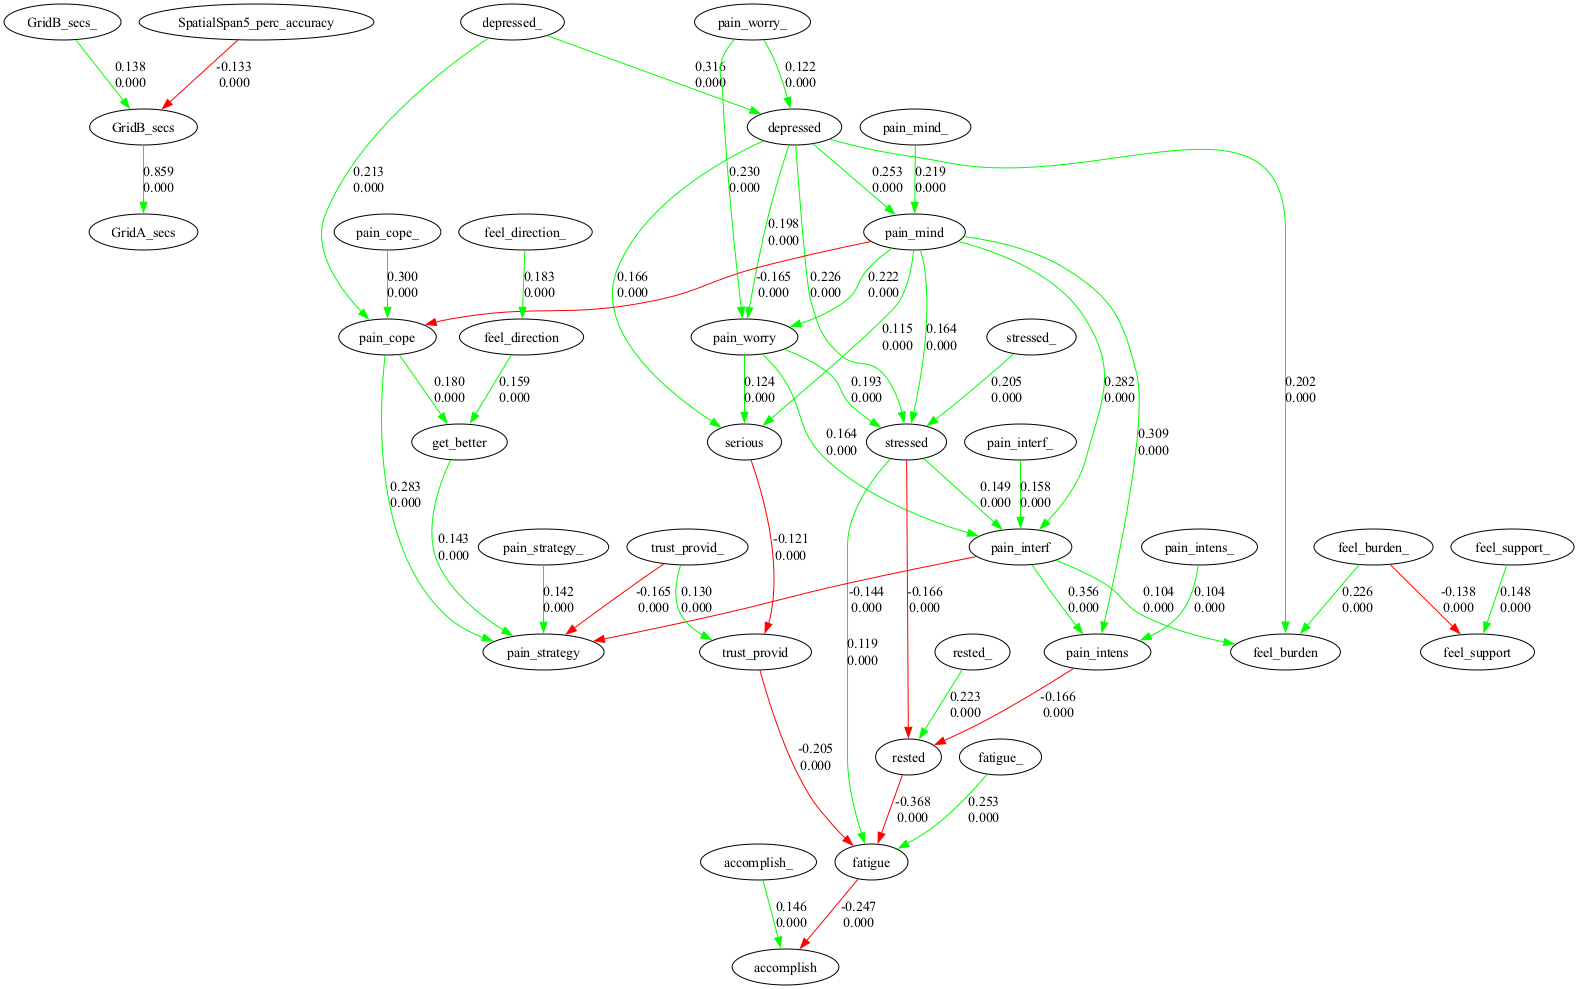

In [ ]:
# create graph for a single group
group = 'group_1'
edge_lists[group] = read_edge_list(edge_texts[group])

# get the ancestors of pain_interf
ancestor_edge_list = get_ancestors_dag(edge_lists[group], 'pain_interf')
print(f"Edges: {ancestor_edge_list}")

# convert full edges for lavaan model
lavaan_model = fc.edges_to_lavaan(edge_lists[group])

# read in the data for the group
data = read_group_data(groups[group])
# run sem
sem_results = fc.run_semopy(lavaan_model, data)


dg = DgraphFlex()  # create an object
dg.add_edges(edge_lists[group])  # add all edges
fc.add_sem_results_to_graph(dg, sem_results['estimates'])
# dg.save_graph(f"{group}_graph")
dg.show_graph()

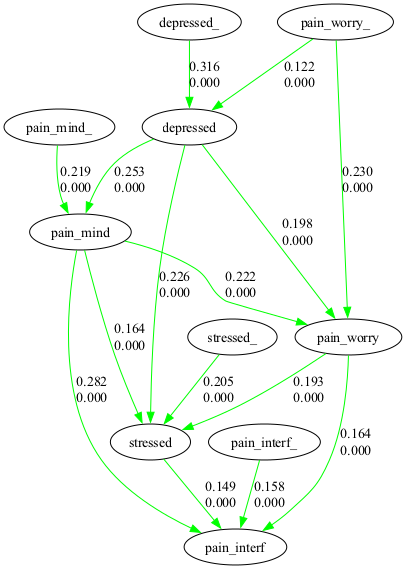

In [14]:
# create another plot with just the ancestors
dg2 = DgraphFlex()  # create an object
dg2.add_edges(ancestor_edge_list)  # add edges
fc.add_sem_results_to_graph(dg2, sem_results['estimates'])
# dg2.save_graph(f"{group}_ancestors_graph")
dg2.show_graph()

How to create a heatmap version with the groups divided based on cda groups



In [14]:
# order the subjects in each group by their R numbers
groups_sorted = {}
for group in group_keys:
    groups_sorted[group] = sorted(groups[group], key=lambda x: int(x[1:]))
    print(f"{group}: {groups_sorted[group]}")
pass

group_1: ['R3', 'R4', 'R9', 'R16', 'R18', 'R21', 'R22', 'R23', 'R24', 'R25', 'R27']
group_2: ['R6', 'R15']
group_3: ['R11', 'R14']
group_4: ['R2', 'R8', 'R26', 'R28']
group_5: ['R10', 'R13', 'R20']


In [16]:
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def cmap_red_green():
    
    # 1. Create the custom colormap
    # Define the colors for the colormap: red, white, and green
    colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]  # These are RGB tuples for (Red, White, Green)

    # Define the positions (nodes) for each color. 
    # -1 corresponds to node 0.0
    #  0 corresponds to node 0.5
    # +1 corresponds to node 1.0
    nodes = [0.0, 0.5, 1.0]

    # Create the colormap using LinearSegmentedColormap
    # The name 'red_white_green' is what you can call it by later if you register it.
    cmap_name = 'red_white_green'
    my_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, list(zip(nodes, colors)))
    return my_cmap

In [17]:
def create_heatmap(df: pd.DataFrame,
                    cmap,  # colormap
                    title: str = "Heatmap",
                    cbar_label: str='Standardized R',
                    xtick_labelsize: int = 18,
                    ytick_labelsize: int = 18,
                    title_fontsize: int = 30,
                    grid_fontsize: int = 12,
                    grid_alpha: float = .5,
                    grid_linewidth: int = 1,
                    
                    # horizontal line arguments
                    horiz_linewidth: int = 4,
                    horiz_color: str = 'purple',
                    horiz_rows: list = [],
                    horiz_labels: list = [],

                    # vertical line arguments
                    verti_linewidth: int = 4,
                    verti_color: str = 'black',
                    verti_labels: list = [],
                    
                    # reorder_rows
                    reorder_rows: list = [],

                   ):
    """
    Create a heatmap
    """
    
    # 1. get information from the df
    df_copy = df.copy()
    # set the index to be the first column
    df_copy = df_copy.set_index(df_copy.columns[0])

    # reorder the rows
    if reorder_rows:
        df_copy = df_copy.reindex(reorder_rows)
        
    col_labels = list(df_copy.columns)
    row_labels = list(df_copy.index)
    data = df_copy.to_numpy()
    

    # 2. Create the plot
    fig_width = max(8, data.shape[1] * 0.8)
    fig_height = max(6, data.shape[0] * 0.6)
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    im = ax.imshow(data, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')

    # 3. Add text annotations
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color = "white" if abs(data[i, j]) > 0.6 else "black"
            ax.text(j, i, f"{data[i, j]:.1f}",
                        ha="center", va="center", color=color, 
                        fontsize=grid_fontsize)

    # 4. Set up axes
    ax.set_xticks(np.arange(len(col_labels)))
    ax.set_yticks(np.arange(len(row_labels)))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # 5. Add gridlines
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', 
            linewidth=grid_linewidth, alpha=grid_alpha)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    # 6. Add horizontal lines
    if horiz_labels:
        for horiz_label in horiz_labels:
            if horiz_label in row_labels:
                row_index = row_labels.index(horiz_label)
                line_y = row_index + 0.5
                ax.hlines(y=line_y, xmin=-0.5, xmax=data.shape[1] - 0.5, 
                        color=horiz_color, linewidth=horiz_linewidth, linestyle='-')
          
    # 7. Add vertical lines at specified locations
    if verti_labels:
        num_rows = data.shape[0]  # Get the number of rows for the line's height
        for verti_label in verti_labels:
            # Find the index of the column that matches the string
            if verti_label in col_labels:
                col_index = col_labels.index(verti_label)
                # Position the line to the RIGHT of the specified column
                line_x = col_index + 0.5
                ax.vlines(x=line_x, ymin=-0.5, ymax=num_rows - 0.5,
                        color=verti_color, linewidth=verti_linewidth, linestyle='-')
                
    # --- FONT SIZE ADJUSTMENTS ---
    ax.set_title(title, fontsize=title_fontsize)
    ax.tick_params(axis='x', labelsize=xtick_labelsize)
    ax.tick_params(axis='y', labelsize=ytick_labelsize)
    
    fig.tight_layout()
    plt.colorbar(im, ax=ax, label=cbar_label, shrink=1.2)
    plt.show()

In [18]:
# create the list of horizontal labels which are the last element of each group in groups_sorted
horiz_labels = []
for group in group_keys:
    horiz_labels.append(groups_sorted[group][-1])

horiz_labels

['R27', 'R15', 'R14', 'R28', 'R20']

In [22]:
# create the list of sorted groups
reorder_rows = []
for group in group_keys:
    reorder_rows.extend(groups_sorted[group])
    
reorder_rows

['R3',
 'R4',
 'R9',
 'R16',
 'R18',
 'R21',
 'R22',
 'R23',
 'R24',
 'R25',
 'R27',
 'R6',
 'R15',
 'R11',
 'R14',
 'R2',
 'R8',
 'R26',
 'R28',
 'R10',
 'R13',
 'R20']

In [27]:
# Load the dataframe from the CSV file you uploaded
data_df = pd.read_csv('cpcrun1_effectsize_grid_pain_interf_pmax_10.csv')

# reorder_rows list to reorder the dataframe rows. The column in the dataframe is the first column

data_df = data_df.set_index(data_df.columns[0])
data_df = data_df.reindex(reorder_rows)
# rename the index to be a column again
data_df = data_df.reset_index()
pass

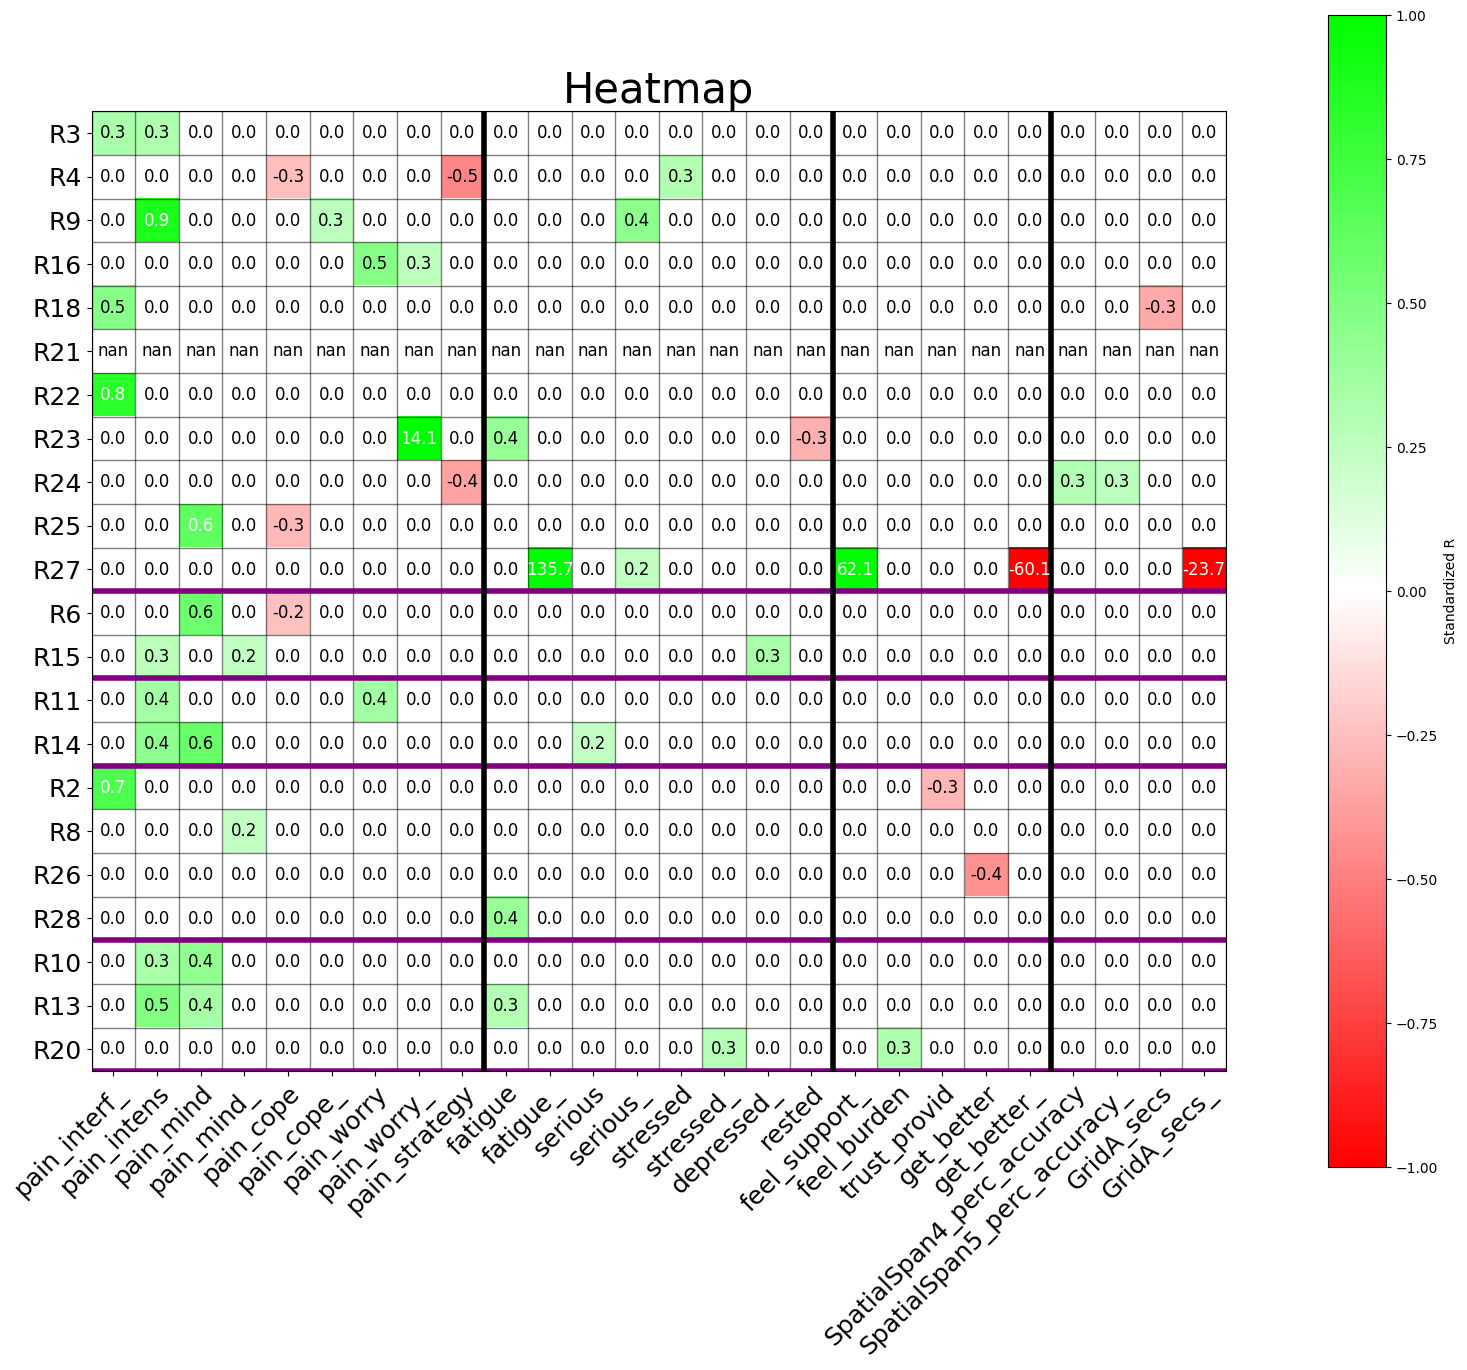

In [28]:

# do the heatmap
create_heatmap(data_df, cmap_red_green(),
                verti_labels = ['pain_strategy',
                                'rested',
                                'get_better_',
                                ],
                horiz_labels = horiz_labels,
)
